Question 1b:
* Solve directly for x
* Obtain the LU, LDL, and Cholesky decompositions for A
* Answer: How do the decompositions you obtain from functions differ from what you did by hand in part a?

In [82]:
import numpy as np
import scipy
import scipy.linalg
import cmath

def LU(A,b):
    P, L, U = scipy.linalg.lu(A) #LU decomposition of A
    x = np.linalg.solve(A,b) # solve directly for x

    print(f'The solution of Ax=b is \n x = {x} \n')
    print(f'The LU decomosition of A is \n L:  \n {L} \n \nU: \n {U} \n')
    ALU = L@U
    print(f'A = LU =  \n {ALU} \n')

# Obtain LDL Decompositions for A #the result for L and D relys on the permutation of A 
# that is computed by python during the decomposition. A will result in different solutions when permuted.
def LDL(A):
    Lu,D,Perm = scipy.linalg.ldl(A)
    print(f'L= \n {Lu} \n\n D = \n {D} \n\n Lt = \n {Lu.transpose()} \n')
    print(f'The permutation applied on A is P = \n {Perm}\n\n')

    Aldlt = (Lu@D)@Lu.transpose()
    print(f'The LDL decomosition of A = LDL^t = \n {Aldlt} \n')

# Obtain Cholesky decompositions for A 
def Cholesky(A):
    P, L, U = scipy.linalg.lu(A)
    #Lu,Dldl,Perm = scipy.linalg.ldl(A)
    D = np.zeros((len(U[0]),len(U[1])))
    P_inv = np.linalg.inv(P)

    for i in range(0,len(U[0])):
        for j in range(0,len(U[1])):
            if i == j:   
                D[i,j] = U[i,j]

    D_cholesky = D**(1/2)
    R = L@D_cholesky
    R_inv = D_cholesky@L.transpose()
    A_Cholesky = (P_inv@R)@R_inv
    print(f'Using L and U obtained from the LU decomposition above with permutation P = \n{P} \n\n and D^(1/2) = \n {D_cholesky} \n') 
    print(f'A = P_inverse • L•D^(1/2) • D^(1/2)•L_transpose, simplified to A = P_inverse•R•R_transpose where R =\n')
    print(f'{R} \n\n R_transpose = \n {R_inv} \n\n with P_inverse = \n {P_inv} \n\n A = \n {A}')

In [180]:
A = np.array([[1/2, 3/2, 1],[3/2,13/2,5],[1,5,7]])
b = np.array([6,24,21])
LU(A,b)
LDL(A)
Cholesky(A)

The solution of Ax=b is 
 x = [4. 2. 1.] 

The LU decomosition of A is 
 L:  
 [[ 1.          0.          0.        ]
 [ 0.66666667  1.          0.        ]
 [ 0.33333333 -1.          1.        ]] 
 
U: 
 [[1.5        6.5        5.        ]
 [0.         0.66666667 3.66666667]
 [0.         0.         3.        ]] 

A = LU =  
 [[1.5 6.5 5. ]
 [1.  5.  7. ]
 [0.5 1.5 1. ]] 

L= 
 [[1. 0. 0.]
 [3. 1. 0.]
 [2. 1. 1.]] 

 D = 
 [[0.5 0.  0. ]
 [0.  2.  0. ]
 [0.  0.  3. ]] 

 Lt = 
 [[1. 3. 2.]
 [0. 1. 1.]
 [0. 0. 1.]] 

The permutation applied on A is P = 
 [0 1 2]


The LDL decomosition of A = LDL^t = 
 [[0.5 1.5 1. ]
 [1.5 6.5 5. ]
 [1.  5.  7. ]] 

Using L and U obtained from the LU decomposition above with permutation P = 
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]] 

 and D^(1/2) = 
 [[1.22474487 0.         0.        ]
 [0.         0.81649658 0.        ]
 [0.         0.         1.73205081]] 

A = P_inverse • L•D^(1/2) • D^(1/2)•L_transpose, simplified to A = P_inverse•R•R_transpose where R =

Discussion:

When solving A•x = b by hand in part a, the simplest method for computing U was using forward elimination,

 and then back substitution to solve for x. In order to obtain an x, we did not need to compute L. 

In the LU decomposition of part 1b however; the function np.linalg.lu(A,b)

 returns a different upper triangular matrix U. 


This is becasue numpy applied a permutiation on A, 

which changes the resulting U and L becasue the resulting U and L are 
unique to A and are sensitive to the configuration of the matrix A's rows. 



Thus, the LU and the Choleskey decompositions differ from the U and L from 1a 

becasue by hand I did not apply a permutation
on the matrix A. However, when multiplying the factors L and U obtained using 

the function in python, it returns the matrix 
A, but with rows in a different order. In the Cholesky decomposition, because 

it was performed using the same L and U from the LU decomposition before, the permutation was required 

as a factor of A. Thus, the inverse of the permutation is included in the Cholesky decomposition of A. 



For the LDL decomposition, no permutation was applied and the python function 

returned the same L that was computed in part 1a, and the resulting D with it's diagnal constructed from the positive pivots of the U computed by hand.

1c. Reconstruct and discuss the results as in b but with a new matrix (given) and right-hand side.

In [179]:
Ac = np.array([[1/2,3/2,1],[3/2,13/2,5],[1,5,1]])
bc = np.array([6,24,15])
LU(Ac,bc)
LDL(Ac)
#Cholesky(Ac)

The solution of Ax=b is 
 x = [4. 2. 1.] 

The LU decomosition of A is 
 L:  
 [[ 1.          0.          0.        ]
 [ 0.66666667  1.          0.        ]
 [ 0.33333333 -1.          1.        ]] 
 
U: 
 [[ 1.5         6.5         5.        ]
 [ 0.          0.66666667 -2.33333333]
 [ 0.          0.         -3.        ]] 

A = LU =  
 [[1.5 6.5 5. ]
 [1.  5.  1. ]
 [0.5 1.5 1. ]] 

L= 
 [[1. 0. 0.]
 [3. 1. 0.]
 [2. 1. 1.]] 

 D = 
 [[ 0.5  0.   0. ]
 [ 0.   2.   0. ]
 [ 0.   0.  -3. ]] 

 Lt = 
 [[1. 3. 2.]
 [0. 1. 1.]
 [0. 0. 1.]] 

The permutation applied on A is P = 
 [0 1 2]


The LDL decomosition of A = LDL^t = 
 [[0.5 1.5 1. ]
 [1.5 6.5 5. ]
 [1.  5.  1. ]] 



The matrix given in 1C defined as Ac with solution bc results in the same solution x as found in 1b.


The same formulas were used to decompose Ac into it's LU, LDL and Cholesky decompositions as for the A given in 1A.


The L and U which result from the scipy LU function of Ac produces an upper triangular matrix with a -3 as the third pivot. 

The function that produces LU applies a permutation on A, so the decomposition results in an A with a different order of rows

 as the A given and is also not positive definite becasue it does not have only positive pivots.


The LDL decomposition function does not apply a permutation on A and also produces a D with negative pivots. 

In both 1b and 1c, LDL decomposition is valid because the given square matrix is symmetric, 

but the original Ac given without permuting is also negative definite. 

The LDL decomposition is as given computed using this scipy ldl function. 

There is no Cholesky decomposition becasue Ac does not meet the requirement of positve definiteness. 

Q2:a. Factor A into LU and solve for A•x=b for the right sides bj

   b. What is the matrix [x1, x2, x3]?

In [89]:
A2 = ([[1,-1,0],[-1,2,-1],[0,-1,2]])
P, L, U = scipy.linalg.lu(A2)
print(f'{P} \n\n {L} \n\n {U} \n\n')
b2_1 = ([1,0,0])
b2_2 = ([0,1,0])
b2_3 = ([0,0,1])
x1= np.linalg.solve(A2, b2_1)
x2= np.linalg.solve(A2, b2_2)
x3= np.linalg.solve(A2, b2_3)

print(f'x1 = {x1} \n\n x2 = {x2} \n\n x3 = {x3} \n\n')
xvec = np.array([x1,x2,x3])
print(f'Matrix [x1,x2,x3] = \n {xvec}')

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

 [[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 0. -1.  1.]] 

 [[ 1. -1.  0.]
 [ 0.  1. -1.]
 [ 0.  0.  1.]] 


x1 = [3. 2. 1.] 

 x2 = [2. 2. 1.] 

 x3 = [1. 1. 1.] 


Matrix [x1,x2,x3] = 
 [[3. 2. 1.]
 [2. 2. 1.]
 [1. 1. 1.]]


The matrix [x1,x2,x3] is the inverse of A. A*A(inverse) = I (The identity matrix) which is the matrix given by b. 

In [90]:
A3 = np.array([[2,3,2],[0,4,0],[6,9,7]])
b3 = np.array([2,-8,7])
intersection = np.linalg.solve(A3,b3)
print(intersection)

[ 3. -2.  1.]


The intersection of this system of linear equations is given by the vector [x, y, z] which is the solution to A • x = b where b is [2, -8, 7]. The coefficients to the terms in the equations can be used to construct a matrix A. Solving for x will return the intersection of the three planes. the second equation represents a line y = -2. So, it is actually the intersection of two planes and a line. The solution must lie on the line y = -2. Using np.linalg.solve the intersection is [3,-2,1]

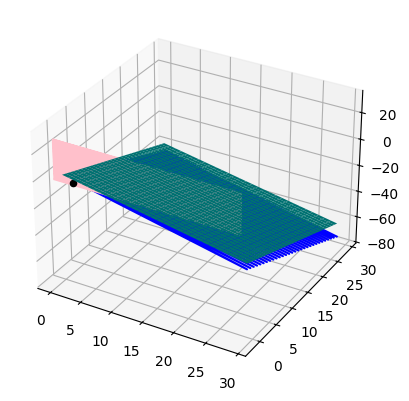

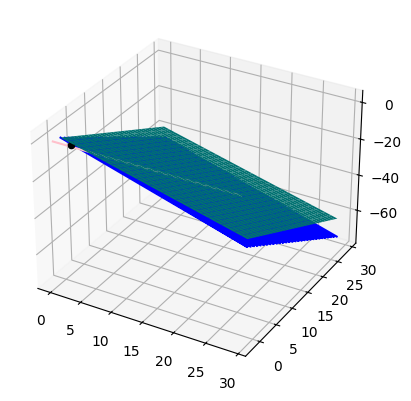

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# a plane is a*x+b*y+c*z+d=0 [a,b,c] is the normal. we need to calculate d.
point1  = np.array([-1,0,0])
normal1 = np.array([2,3,2])

y=-2 #The second equation is a plane described by y=-2 but I'm plotting it also as a line only for visibility purposes. 
point3  = np.array([0,0,-1])
normal3 = np.array([6,9,7])

d1 = -np.sum(point1*normal1)# dot product
d3 = -np.sum(point3*normal3)# dot product

# create x,y
xx, yy = np.meshgrid(range(30), range(30))
xx, zz = np.meshgrid(range(30), range(30))
# calculate corresponding z
z1 = (-normal1[0]*xx - normal1[1]*yy - d1)*1./normal1[2]
z3 = (-normal3[0]*xx - normal3[1]*yy - d3)*1./normal3[2]

plt3d, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot(xx,yy,z1, color='blue')
ax.plot_surface(xx,yy,z3, color='cyan')
ax.plot(xx,-2,zz, color='pink')
ax.scatter(3,-2,1, color ='k')
plt.show()

plt3d, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot(xx,yy,z1, color='blue')
ax.plot_surface(xx,yy,z3, color='cyan')
ax.plot(xx,-2, color='pink')
ax.scatter(3,-2,1, color ='k')
plt.show()

We can flip the x axis of the plane created in the last equation to better see the intersection of the 3 equations.

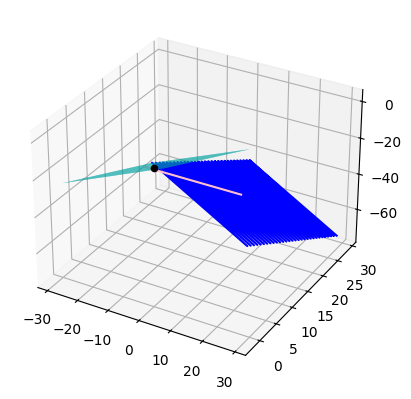

In [177]:
plt3d, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot(xx,yy,z1, color='blue')
ax.plot_surface(-xx,yy,z3, color='cyan')
ax.plot(xx,-2, color='pink')
ax.scatter(3,-2,1, color ='k')
plt.show()

Q4: Produce plots of the level curves of f for the difference of squares and sum of squares cases:

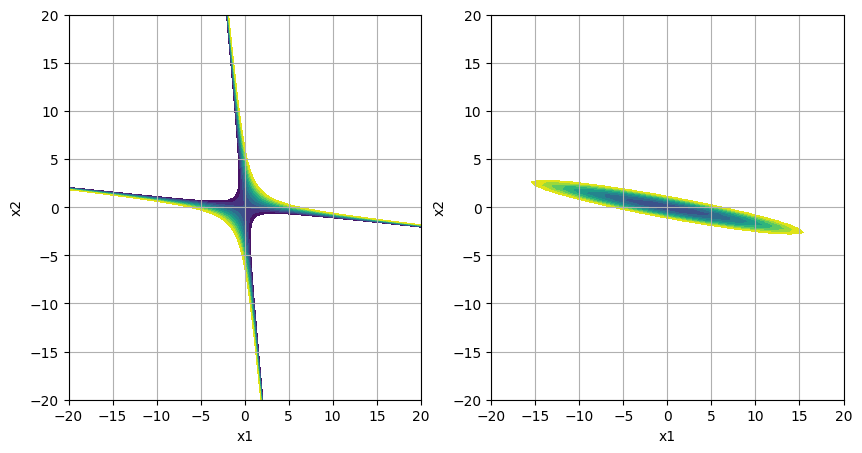

In [165]:
xspace = np.linspace(-20,20,100)
yspace = np.linspace(-20,20,100)
x1,x2 = np.meshgrid(xspace,yspace)
diff_ofsquares = (x1 +5*x2)**2 - 24*x2**2
sum_ofsquares = (x1 +5*x2)**2 +5*x2**2

levels = np.array([-10,-5,0,5,10,15,20,25,30,35,40])

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].grid(True)
ax[1].grid(True)
d = ax[0].contourf(x1,x2, diff_ofsquares,levels = levels)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
s = ax[1].contourf(x1,x2, sum_ofsquares, levels = levels)
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [166]:
def LDL(A):
    Lu,D,Perm = scipy.linalg.ldl(A)
    print(f'L= \n {Lu} \n\n D = \n {D} \n\n Lt = \n {Lu.transpose()} \n')
    print(f'The permutation applied on A is P = \n {Perm}\n\n')

    Aldlt = (Lu@D)@Lu.transpose()
    print(f'The LDL decomosition of A = LDL^t = \n {Aldlt} \n')

A5 = np.array([[1,1,1],[1,2,2],[1,2,3]])
B5 = np.array([[1,1,1],[1,1,1],[1,1,1]])
LDL(A5)
LDL(B5)

L= 
 [[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]] 

 D = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

 Lt = 
 [[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]] 

The permutation applied on A is P = 
 [0 1 2]


The LDL decomosition of A = LDL^t = 
 [[1. 1. 1.]
 [1. 2. 2.]
 [1. 2. 3.]] 

L= 
 [[1. 0. 0.]
 [1. 1. 0.]
 [1. 0. 1.]] 

 D = 
 [[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

 Lt = 
 [[1. 1. 1.]
 [0. 1. 0.]
 [0. 0. 1.]] 

The permutation applied on A is P = 
 [0 1 2]


The LDL decomosition of A = LDL^t = 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

